In [12]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

from sklearn import metrics


import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Random forest and boosting packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

np.set_printoptions(suppress=True)

In [13]:
df = pd.read_csv('../Capstone/Full Dataset.csv',index_col=0)

In [14]:
feature_list = ['AST','TRB','FG%','FT%','TOV','STL','BLK','PTS','Pos']

# pos_to_num_map = {'PG':1,'SG':2,'SF':3,'PF':4,'C':5}
df = df[(df['MP'] > 0) & (df['G'] > 0) & (df['PTS'] > 0)]
df_subset = df[feature_list].copy()
# df_subset.Pos = df_subset.Pos.map(pos_to_num_map)
df_subset.loc[:,'Pos'] = pd.Categorical(df_subset.loc[:,'Pos'])

df.shape
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OBPM,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share
0,Kareem Abdul-Jabbar,5,32,LAL,82,0,38.3,10.2,16.9,0.604,...,4.8,2.4,7.2,7.3,1980,1.0,147.0,147.0,221.0,0.665
1,Tom Abernethy,4,25,GSW,67,0,18.2,2.3,4.7,0.481,...,-1.0,-0.2,-1.2,0.2,1980,0.0,0.0,0.0,0.0,0.000
2,Alvan Adams,5,25,PHO,75,0,28.9,6.2,11.7,0.531,...,1.7,1.9,3.6,3.1,1980,0.0,0.0,0.0,0.0,0.000
3,Tiny Archibald,1,31,BOS,80,80,35.8,4.8,9.9,0.482,...,1.4,-0.3,1.1,2.3,1980,5.0,2.0,2.0,221.0,0.009
4,Dennis Awtrey,5,31,CHI,26,0,21.5,1.0,2.3,0.450,...,-2.3,0.9,-1.4,0.1,1980,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,Thaddeus Young,4,33,TOT,52,1,16.3,2.7,5.2,0.518,...,0.1,2.1,2.2,0.9,2022,0.0,0.0,0.0,0.0,0.000
18260,Trae Young,1,23,ATL,76,76,34.9,9.4,20.3,0.460,...,7.1,-2.0,5.2,4.8,2022,0.0,0.0,0.0,0.0,0.000
18261,Omer Yurtseven,5,23,MIA,56,12,12.6,2.3,4.4,0.526,...,-1.4,0.4,-1.0,0.2,2022,0.0,0.0,0.0,0.0,0.000
18262,Cody Zeller,5,29,POR,27,0,13.1,1.9,3.3,0.567,...,-1.2,-1.0,-2.1,0.0,2022,0.0,0.0,0.0,0.0,0.000


In [15]:
X = df_subset.drop('Pos',axis=1)
y = df_subset.Pos

features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
gbm = GradientBoostingClassifier(n_estimators = 200,
                                learning_rate = 1,
                                max_depth = 2,
                                random_state = 1)

In [17]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=200,
                           random_state=1)

In [18]:
predicted_values_gbm = gbm.predict(X_test)


In [19]:
conf_matrix_boosting = metrics.confusion_matrix(y_test, predicted_values_gbm)
print(conf_matrix_boosting)
# Compute test model accuracy score.
accuracy_gbm = metrics.accuracy_score(y_test, predicted_values_gbm)
print('Accuracy of gbm on test data: ', accuracy_gbm)


[[832 164  25   5   0]
 [181 671 245  51   5]
 [ 22 245 513 189  53]
 [  6  33 208 541 295]
 [  4   9  43 365 718]]
Accuracy of gbm on test data:  0.6039092753088696


Text(0.5, 0, 'Relative Importance')

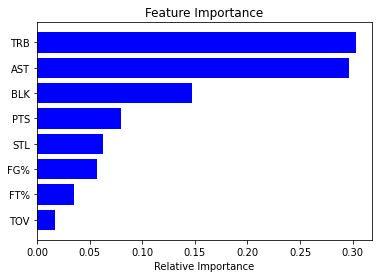

In [20]:

importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[0:10][::-1]

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), features[top_indices])
plt.xlabel('Relative Importance')